In [3]:
from re import I
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix


from sklearn import metrics

In [4]:
num_classes = 10

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_train=x_train/255.0
x_train.shape


x_test=x_test/255.0
x_test.shape

170508288/170498071 [==============================] - 2s 0us/step


(10000, 32, 32, 3)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
model=tf.keras.models.Sequential(
    [
     layers.Conv2D(filters=32,kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
     layers.Flatten(),
     layers.Dropout(0.2),
     layers.Dense(units=10,activation='softmax')

    ] 
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 10)                327690    
                                                                 
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [7]:
history = model.fit(x_train,y_train, batch_size = 128, epochs=15, validation_split=0.1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)


print("Test accuracy: {}".format(test_accuracy))

Epoch 1/15
352/352 [==============================] - 51s 143ms/step - loss: 1.5297 - accuracy: 0.4629 - val_loss: 1.2953 - val_accuracy: 0.5518
Epoch 2/15
352/352 [==============================] - 47s 132ms/step - loss: 1.2395 - accuracy: 0.5669 - val_loss: 1.2392 - val_accuracy: 0.5722
Epoch 3/15
352/352 [==============================] - 45s 128ms/step - loss: 1.1521 - accuracy: 0.5991 - val_loss: 1.1856 - val_accuracy: 0.5904
Epoch 4/15
352/352 [==============================] - 46s 130ms/step - loss: 1.0861 - accuracy: 0.6222 - val_loss: 1.1989 - val_accuracy: 0.5900
Epoch 5/15
352/352 [==============================] - 45s 129ms/step - loss: 1.0255 - accuracy: 0.6457 - val_loss: 1.1346 - val_accuracy: 0.6094
Epoch 6/15
352/352 [==============================] - 46s 131ms/step - loss: 0.9888 - accuracy: 0.6603 - val_loss: 1.1747 - val_accuracy: 0.5996
Epoch 7/15
352/352 [==============================] - 44s 126ms/step - loss: 0.9406 - accuracy: 0.6768 - val_loss: 1.1467 - val_ac

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.1576136350631714
Test accuracy: 0.6065000295639038


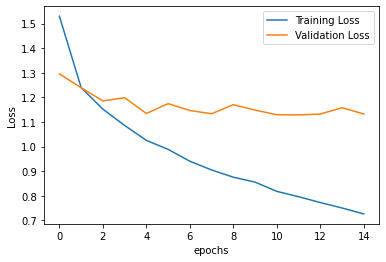

In [13]:

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
    
# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')


# Display a legend.
plt.legend()





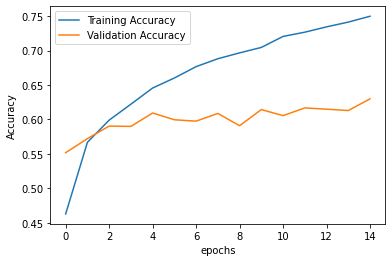

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
    

plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.legend()

In [15]:
#Model 2

model2=tf.keras.models.Sequential(
    [
     layers.Conv2D(filters=32,kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
     layers.MaxPool2D(pool_size=2,strides=2, padding="valid"),
     layers.Flatten(),
     layers.Dropout(0.2),
     layers.Dense(units=10,activation='softmax')

    ] 
)

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
__________________________________________________

In [17]:
model2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
history2 = model2.fit(x_train,y_train, batch_size = 128, epochs=15, validation_split=0.1)

test_loss, test_accuracy = model2.evaluate(x_test, y_test)


print("Test accuracy: {}".format(test_accuracy))

Epoch 1/15
352/352 [==============================] - 40s 114ms/step - loss: 1.6036 - accuracy: 0.4407 - val_loss: 1.3690 - val_accuracy: 0.5306
Epoch 2/15
352/352 [==============================] - 41s 117ms/step - loss: 1.3056 - accuracy: 0.5457 - val_loss: 1.2643 - val_accuracy: 0.5584
Epoch 3/15
352/352 [==============================] - 40s 114ms/step - loss: 1.2136 - accuracy: 0.5796 - val_loss: 1.2038 - val_accuracy: 0.5776
Epoch 4/15
352/352 [==============================] - 41s 118ms/step - loss: 1.1544 - accuracy: 0.6028 - val_loss: 1.1705 - val_accuracy: 0.5980
Epoch 5/15
352/352 [==============================] - 40s 114ms/step - loss: 1.1098 - accuracy: 0.6174 - val_loss: 1.1343 - val_accuracy: 0.6108
Epoch 6/15
352/352 [==============================] - 40s 113ms/step - loss: 1.0773 - accuracy: 0.6274 - val_loss: 1.1147 - val_accuracy: 0.6170
Epoch 7/15
352/352 [==============================] - 40s 114ms/step - loss: 1.0490 - accuracy: 0.6370 - val_loss: 1.1106 - val_ac

In [19]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 1.0313878059387207
Test accuracy: 0.6389999985694885


Text(0.5, 0, 'epochs')

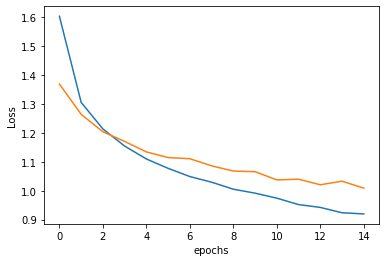

In [20]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
    
# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')

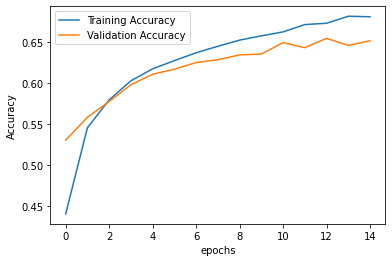

In [22]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
    

plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.legend()

In [6]:
#Model 3

model3=tf.keras.models.Sequential(
    [
     layers.Conv2D(filters=32,kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),

     layers.MaxPool2D(pool_size=2,strides=2),
     
     layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes,activation='softmax')

    ] 
)


In [7]:
model3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0

In [25]:
history3 = model3.fit(x_train,y_train, batch_size = 128, epochs=15, validation_split=0.1)



Epoch 1/15
352/352 [==============================] - 75s 212ms/step - loss: 1.6374 - accuracy: 0.4190 - val_loss: 1.3722 - val_accuracy: 0.5204
Epoch 2/15
352/352 [==============================] - 82s 232ms/step - loss: 1.3193 - accuracy: 0.5332 - val_loss: 1.2103 - val_accuracy: 0.5800
Epoch 3/15
352/352 [==============================] - 77s 218ms/step - loss: 1.2066 - accuracy: 0.5772 - val_loss: 1.0961 - val_accuracy: 0.6296
Epoch 4/15
352/352 [==============================] - 78s 221ms/step - loss: 1.1341 - accuracy: 0.6045 - val_loss: 1.0650 - val_accuracy: 0.6304
Epoch 5/15
352/352 [==============================] - 76s 217ms/step - loss: 1.0809 - accuracy: 0.6228 - val_loss: 1.0233 - val_accuracy: 0.6580
Epoch 6/15
352/352 [==============================] - 76s 215ms/step - loss: 1.0432 - accuracy: 0.6357 - val_loss: 0.9756 - val_accuracy: 0.6718
Epoch 7/15
352/352 [==============================] - 76s 216ms/step - loss: 1.0098 - accuracy: 0.6490 - val_loss: 0.9397 - val_ac

In [26]:
test_loss, test_accuracy = model3.evaluate(x_test, y_test)


print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 5s 17ms/step - loss: 0.8622 - accuracy: 0.7032
Test accuracy: 0.7031999826431274


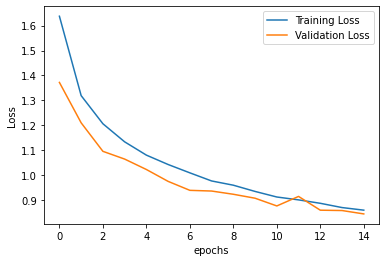

In [27]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
    
# X and Y axes labels.
plt.ylabel('Loss')
plt.xlabel('epochs')


# Display a legend.
plt.legend()


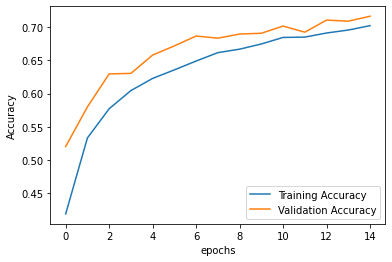

In [28]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
    

plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.legend()